In [1]:
import numpy as np
from scipy import linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pg_fitter_tools as fit

In [2]:
%matplotlib notebook

In [3]:
nimages = 9
nfeatures = 40
image_feature_locations = np.zeros((nimages,nfeatures,2))

In [4]:
image_feature_locations[0, 0] = [2100, 150]
image_feature_locations[0, 1] = [2092, 319]
image_feature_locations[0, 2] = [2079, 588]
image_feature_locations[0, 4] = [2256, 156]
image_feature_locations[0, 7] = [2182, 1436]
image_feature_locations[0, 8] = [2134, 2302]
image_feature_locations[0, 11] = [2516, 162]
image_feature_locations[0, 12] = [2505, 329]
image_feature_locations[0, 13] = [2485, 601]
image_feature_locations[0, 14] = [2419, 1449]
image_feature_locations[0, 15] = [2356, 2316]
image_feature_locations[0, 18] = [2660, 334]
image_feature_locations[0, 19] = [2636, 602]
image_feature_locations[1, 0] = [1825, 1236]
image_feature_locations[1, 1] = [1819, 1345]
image_feature_locations[1, 2] = [1811, 1526]
image_feature_locations[1, 4] = [1934, 1242]
image_feature_locations[1, 5] = [1928, 1350]
image_feature_locations[1, 6] = [1920, 1530]
image_feature_locations[1, 7] = [1891, 2156]
image_feature_locations[1, 8] = [1858, 2915]
image_feature_locations[1, 11] = [2114, 1252]
image_feature_locations[1, 12] = [2110, 1358]
image_feature_locations[1, 13] = [2102, 1540]
image_feature_locations[1, 14] = [2076, 2164]
image_feature_locations[1, 15] = [2045, 2924]
image_feature_locations[1, 18] = [2218, 1363]
image_feature_locations[1, 19] = [2211, 1544]
image_feature_locations[1, 21] = [3578, 1603]
image_feature_locations[1, 22] = [3684, 1322]
image_feature_locations[1, 23] = [3684, 1428]
image_feature_locations[1, 24] = [3684, 1607]
image_feature_locations[1, 25] = [3684, 2225]
image_feature_locations[1, 26] = [3686, 2979]
image_feature_locations[1, 29] = [3859, 1332]
image_feature_locations[1, 30] = [3858, 1438]
image_feature_locations[1, 31] = [3858, 1617]
image_feature_locations[1, 32] = [3863, 2234]
image_feature_locations[1, 33] = [3873, 2985]
image_feature_locations[1, 36] = [3962, 1335]
image_feature_locations[1, 37] = [3964, 1443]
image_feature_locations[1, 38] = [3965, 1619]
image_feature_locations[2, 0] = [1064, 1180]
image_feature_locations[2, 1] = [1057, 1291]
image_feature_locations[2, 2] = [1043, 1480]
image_feature_locations[2, 4] = [1176, 1185]
image_feature_locations[2, 5] = [1169, 1297]
image_feature_locations[2, 6] = [1156, 1484]
image_feature_locations[2, 7] = [1114, 2135]
image_feature_locations[2, 8] = [1063, 2928]
image_feature_locations[2, 11] = [1364, 1195]
image_feature_locations[2, 12] = [1358, 1307]
image_feature_locations[2, 13] = [1348, 1495]
image_feature_locations[2, 14] = [1307, 2145]
image_feature_locations[2, 15] = [1260, 2938]
image_feature_locations[2, 18] = [1472, 1312]
image_feature_locations[2, 19] = [1460, 1500]
image_feature_locations[2, 20] = [2897, 1380]
image_feature_locations[2, 21] = [2894, 1566]
image_feature_locations[2, 22] = [3010, 1272]
image_feature_locations[2, 23] = [3008, 1385]
image_feature_locations[2, 24] = [3005, 1570]
image_feature_locations[2, 25] = [2994, 2213]
image_feature_locations[2, 26] = [2986, 2999]
image_feature_locations[2, 29] = [3197, 1283]
image_feature_locations[2, 30] = [3195, 1392]
image_feature_locations[2, 31] = [3193, 1580]
image_feature_locations[2, 32] = [3184, 2223]
image_feature_locations[2, 36] = [3307, 1287]
image_feature_locations[2, 37] = [3304, 1398]
image_feature_locations[2, 38] = [3303, 1584]
image_feature_locations[3, 0] = [1872, 944]
image_feature_locations[3, 1] = [1868, 1034]
image_feature_locations[3, 2] = [1862, 1188]
image_feature_locations[3, 4] = [1964, 949]
image_feature_locations[3, 5] = [1961, 1040]
image_feature_locations[3, 6] = [1954, 1191]
image_feature_locations[3, 7] = [1934, 1720]
image_feature_locations[3, 8] = [1910, 2358]
image_feature_locations[3, 11] = [2117, 957]
image_feature_locations[3, 12] = [2114, 1048]
image_feature_locations[3, 13] = [2109, 1199]
image_feature_locations[3, 14] = [2091, 1726]
image_feature_locations[3, 15] = [2071, 2363]
image_feature_locations[3, 18] = [2206, 1053]
image_feature_locations[3, 19] = [2200, 1204]
image_feature_locations[3, 20] = [3329, 1110]
image_feature_locations[3, 21] = [3330, 1257]
image_feature_locations[3, 22] = [3416, 1025]
image_feature_locations[3, 23] = [3416, 1113]
image_feature_locations[3, 24] = [3417, 1262]
image_feature_locations[3, 25] = [3419, 1769]
image_feature_locations[3, 26] = [3424, 2387]
image_feature_locations[3, 29] = [3559, 1033]
image_feature_locations[3, 30] = [3560, 1122]
image_feature_locations[3, 31] = [3561, 1268]
image_feature_locations[3, 32] = [3563, 1775]
image_feature_locations[3, 33] = [3572, 2388]
image_feature_locations[3, 36] = [3647, 1039]
image_feature_locations[3, 37] = [3644, 1126]
image_feature_locations[3, 38] = [3646, 1272]
image_feature_locations[4, 0] = [1783, 60]
image_feature_locations[4, 1] = [1777, 145]
image_feature_locations[4, 2] = [1769, 287]
image_feature_locations[4, 3] = [1638, 2710]
image_feature_locations[4, 4] = [1871, 71]
image_feature_locations[4, 5] = [1866, 154]
image_feature_locations[4, 6] = [1857, 297]
image_feature_locations[4, 7] = [1829, 790]
image_feature_locations[4, 8] = [1798, 1389]
image_feature_locations[4, 9] = [1764, 2072]
image_feature_locations[4, 10] = [1734, 2710]
image_feature_locations[4, 11] = [2019, 86]
image_feature_locations[4, 12] = [2014, 170]
image_feature_locations[4, 13] = [2007, 313]
image_feature_locations[4, 14] = [1981, 803]
image_feature_locations[4, 15] = [1952, 1399]
image_feature_locations[4, 16] = [1921, 2077]
image_feature_locations[4, 17] = [1892, 2715]
image_feature_locations[4, 18] = [2100, 179]
image_feature_locations[4, 19] = [2094, 321]
image_feature_locations[4, 20] = [3152, 298]
image_feature_locations[4, 21] = [3151, 433]
image_feature_locations[4, 23] = [3231, 308]
image_feature_locations[4, 24] = [3230, 442]
image_feature_locations[4, 25] = [3223, 906]
image_feature_locations[4, 26] = [3218, 1474]
image_feature_locations[4, 27] = [3212, 2117]
image_feature_locations[4, 28] = [3206, 2717]
image_feature_locations[4, 29] = [3364, 243]
image_feature_locations[4, 30] = [3361, 321]
image_feature_locations[4, 31] = [3361, 457]
image_feature_locations[4, 32] = [3358, 917]
image_feature_locations[4, 33] = [3354, 1481]
image_feature_locations[4, 34] = [3352, 2121]
image_feature_locations[4, 35] = [3349, 2720]
image_feature_locations[4, 36] = [3440, 251]
image_feature_locations[4, 37] = [3439, 332]
image_feature_locations[4, 38] = [3439, 462]
image_feature_locations[4, 39] = [3438, 2723]
image_feature_locations[5, 3] = [317, 1561]
image_feature_locations[5, 10] = [468, 1564]
image_feature_locations[5, 17] = [713, 1570]
image_feature_locations[5, 27] = [2731, 736]
image_feature_locations[5, 28] = [2660, 1605]
image_feature_locations[5, 34] = [2939, 749]
image_feature_locations[5, 35] = [2857, 1607]
image_feature_locations[5, 39] = [2975, 1610]
image_feature_locations[6, 3] = [1029, 1322]
image_feature_locations[6, 9] = [1137, 406]
image_feature_locations[6, 10] = [1159, 1327]
image_feature_locations[6, 16] = [1369, 417]
image_feature_locations[6, 17] = [1374, 1337]
image_feature_locations[6, 27] = [3391, 497]
image_feature_locations[6, 28] = [3257, 1398]
image_feature_locations[6, 34] = [3616, 506]
image_feature_locations[6, 35] = [3468, 1407]
image_feature_locations[6, 39] = [3600, 1413]
image_feature_locations[7, 0] = [1895, 756]
image_feature_locations[7, 1] = [1887, 953]
image_feature_locations[7, 2] = [1873, 1277]
image_feature_locations[7, 4] = [2090, 764]
image_feature_locations[7, 5] = [2081, 960]
image_feature_locations[7, 6] = [2065, 1284]
image_feature_locations[7, 7] = [2018, 2348]
image_feature_locations[7, 11] = [2412, 777]
image_feature_locations[7, 12] = [2402, 974]
image_feature_locations[7, 13] = [2387, 1299]
image_feature_locations[7, 14] = [2330, 2361]
image_feature_locations[7, 18] = [2596, 982]
image_feature_locations[7, 19] = [2576, 1307]
image_feature_locations[8, 3] = [1082, 1821]
image_feature_locations[8, 8] = [1209, 509]
image_feature_locations[8, 9] = [1190, 1206]
image_feature_locations[8, 10] = [1175, 1825]
image_feature_locations[8, 15] = [1365, 513]
image_feature_locations[8, 16] = [1345, 1211]
image_feature_locations[8, 17] = [1328, 1833]
image_feature_locations[8, 26] = [2767, 551]
image_feature_locations[8, 27] = [2733, 1258]
image_feature_locations[8, 28] = [2700, 1885]
image_feature_locations[8, 33] = [2928, 553]
image_feature_locations[8, 34] = [2894, 1263]
image_feature_locations[8, 35] = [2858, 1891]
image_feature_locations[8, 39] = [2956, 1896]

In [5]:
true_feature_locations = np.array([
    [0, 4419.6, 0],
    [0, 4267.2, 0],
    [0, 4013.2, 0],
    [0, 0, 0],
    [152.4, 4419.6, 0],
    [152.4, 4267.2, 0],
    [152.4, 4013.2, 0],
    [152.4, 3149.6, 0],
    [152.4, 2133.6, 0],
    [152.4, 1016, 0],
    [152.4, 0, 0],
    [406.4, 4419.6, 0],
    [406.4, 4267.2, 0],
    [406.4, 4013.2, 0],
    [406.4, 3149.6, 0],
    [406.4, 2133.6, 0],
    [406.4, 1016, 0],
    [406.4, 0, 0],
    [558.8, 4267.2, 0],
    [558.8, 4013.2, 0],
    [2489.2, 4267.2, 0],
    [2489.2, 4013.2, 0],
    [2641.6, 4419.6, 0],
    [2641.6, 4267.2, 0],
    [2641.6, 4013.2, 0],
    [2641.6, 3149.6, 0],
    [2641.6, 2133.6, 0],
    [2641.6, 1016, 0],
    [2641.6, 0, 0],
    [2895.6, 4419.6, 0],
    [2895.6, 4267.2, 0],
    [2895.6, 4013.2, 0],
    [2895.6, 3149.6, 0],
    [2895.6, 2133.6, 0],
    [2895.6, 1016, 0],
    [2895.6, 0, 0],
    [3048, 4419.6, 0],
    [3048, 4267.2, 0],
    [3048, 4013.2, 0],
    [3048, 0, 0]])

In [6]:
focal_length = [2.760529621789217e+03, 2.767014510543478e+03]
principle_point = [1.914303537872458e+03, 1.596386868474348e+03]
seed_feature_locations = np.random.normal(true_feature_locations, 30)
fitter = fit.photogrammetry_fitter(image_feature_locations, seed_feature_locations, focal_length, principle_point)

In [7]:
camera_rotations, camera_translations = fitter.estimate_camera_poses()

image 0 reprojection errors:    average: 40.05406859421872    max: 60.49497180151223
image 0 reprojection errors:    average: 40.05406859421872    max: 60.49497180151223
image 1 reprojection errors:    average: 28.92829041074112    max: 46.26832577386998
image 1 reprojection errors:    average: 28.92829041074112    max: 46.26832577386998
image 2 reprojection errors:    average: 27.734834585890983    max: 50.39677612469659
image 2 reprojection errors:    average: 27.734834585890983    max: 50.39677612469659
image 3 reprojection errors:    average: 24.457823277089428    max: 36.56974713370649
image 3 reprojection errors:    average: 24.457823277089428    max: 36.56974713370649
image 4 reprojection errors:    average: 25.719184453558423    max: 51.80175161893922
image 4 reprojection errors:    average: 25.719184453558423    max: 51.80175161893922
image 5 reprojection errors:    average: 40.30565059162244    max: 70.86402323390767
image 5 reprojection errors:    average: 40.30565059162244 

In [8]:
camera_rotations, camera_translations, reco_locations = fitter.bundle_adjustment(camera_rotations, camera_translations)

`ftol` termination condition is satisfied.
Function evaluations 1410, initial cost 9.7216e+04, final cost 8.5543e+01, first-order optimality 2.84e-01.
mean reprojection error: 0.8243546626568237
max reprojection error: 2.981714963224801


In [9]:
errors, true_translated, reco_transformed, scale, R, translation = fit.kabsch_errors(
    true_feature_locations, reco_locations)
print("mean reconstruction error:", linalg.norm(errors, axis=1).mean())
print("max reconstruction error:", linalg.norm(errors, axis=1).max())

mean reconstruction error: 9.891271978701761
max reconstruction error: 27.4323765486915


In [10]:
camera_orientations, camera_positions = fit.camera_poses(camera_rotations, camera_translations)
camera_orientations = np.matmul(R, camera_orientations)
camera_positions = camera_positions - translation
camera_positions = scale*R.dot(camera_positions.transpose()).transpose()

<IPython.core.display.Javascript object>


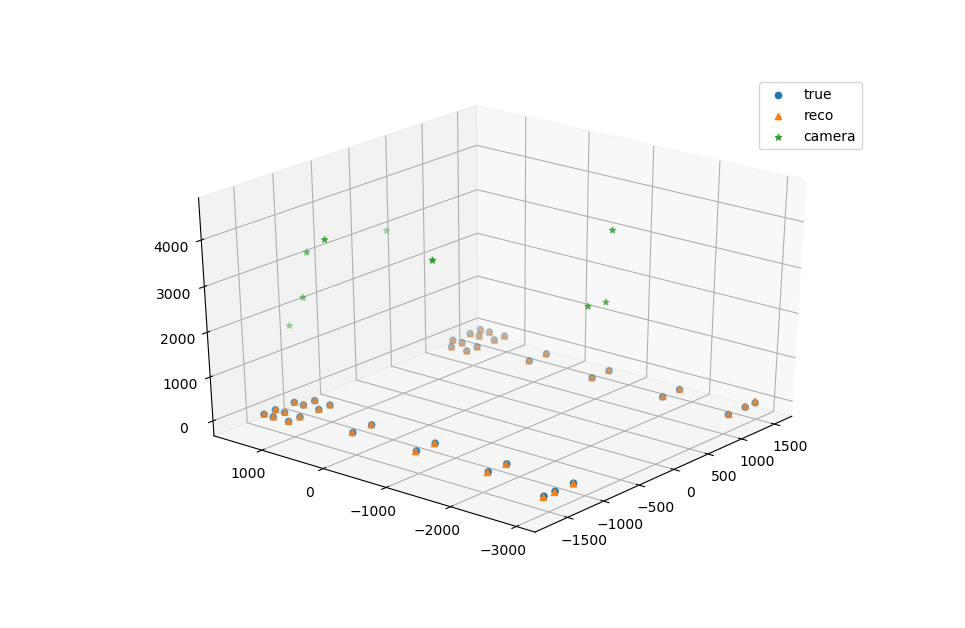

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(true_translated[:,0], true_translated[:,1], true_translated[:,2], marker='o', label="true")
ax.scatter(reco_transformed[:,0], reco_transformed[:,1], reco_transformed[:,2], marker='^', label="reco")
ax.scatter(camera_positions[:,0], camera_positions[:,1], camera_positions[:,2], marker='*', label="camera")
plt.legend(loc=0)

<IPython.core.display.Javascript object>


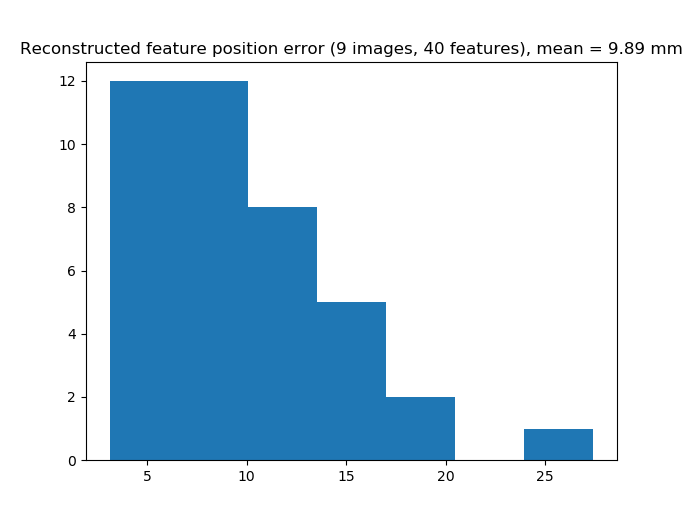

In [12]:
_ = plt.hist(linalg.norm(errors, axis=1), bins='auto')
plt.title("Reconstructed feature position error ({} images, {} features), mean = {:.2f} mm".format(
    nimages, nfeatures, linalg.norm(errors, axis=1).mean()))
plt.show()